In [1]:
import pandas as pd
import numpy as np
import ta
from ta import add_all_ta_features
from ta.utils import dropna
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
# read the sp500 data
df_sp=pd.read_csv("../data/2021-12-06_Top25 SP500 daily.csv")
df_sp.head()

,gvkey,iid,datadate,tic,cusip,conm,div,divd,dvrated,divsppaydate,curcdd,cshoc,cshtrd,eps,prccd,prchd,prcld,prcod,prcstd,exchg,secstat,cik,conml,naics,sic,spcindcd,stko
0,1045,1,20100104,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,17441530.0,-4.98,7.72,7.79,7.45,7.73,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
1,1045,1,20100105,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,24044700.0,-4.98,8.36,8.42,7.68,7.68,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
2,1045,1,20100106,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,15770140.0,-4.98,8.11,8.31,8.01,8.11,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
3,1045,1,20100107,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,17663110.0,-4.98,8.25,8.50,8.05,8.05,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
4,1045,1,20100108,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,12413430.0,-4.98,8.11,8.42,7.97,8.34,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0


In [3]:
df_sp.columns

Index(['gvkey', 'iid', 'datadate', 'tic', 'cusip', 'conm', 'div', 'divd',
       'dvrated', 'divsppaydate', 'curcdd', 'cshoc', 'cshtrd', 'eps', 'prccd',
       'prchd', 'prcld', 'prcod', 'prcstd', 'exchg', 'secstat', 'cik', 'conml',
       'naics', 'sic', 'spcindcd', 'stko'],
      dtype='object')

### Description Columns
- prco = Price Open
- prcc = Price Close
- prch = Price High
- prcl = Price Low
- cshtrd = Trading Volume
- cshov = Shares Outstanding

In [4]:
df_sp["datadate"] = pd.to_datetime(df_sp["datadate"].astype(str), format='%Y%m%d')

In [5]:
len(df_sp["conm"].unique())

51

In [6]:
len(df_sp["tic"].unique())

82

In [7]:
df_sp = df_sp[["datadate", "conm", "tic", "prcod", "prccd", "prchd", "prcld", "cshtrd"]].rename(columns={"prcod": "Open", "prccd": "Close", "prchd": "High", "prcld": "Low", "cshtrd": "Volume"})

In [8]:
# price trend f closed daily or whole timeframe for american airlines
df_aag = df_sp[(df_sp["conm"]=="AMERICAN AIRLINES GROUP INC") & (df_sp["tic"]=="AAL")]
df_aag = df_aag.drop(columns=["conm", "tic"])
df_aag = df_aag.sort_values(by="datadate")
df_aag.reset_index(inplace=True, drop=True)

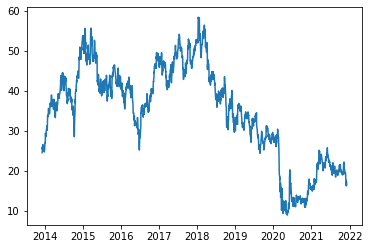

In [9]:
plt.plot(df_aag["datadate"], df_aag["Close"])
plt.show()

In [10]:
df_aag["Close"].isnull().values.any()

False

## All features from python package

In [11]:
df_aag = dropna(df_aag)

In [12]:
df_aag_all_features = df_aag.copy()

In [13]:
df_aag_all_features = add_all_ta_features(df_aag_all_features, open="Open", high="High", low="Low", close="Close", volume="Volume")

C:\Users\Rahim\anaconda3\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\Rahim\anaconda3\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [14]:
df_aag_all_features.columns

Index(['datadate', 'Open', 'Close', 'High', 'Low', 'Volume', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em',
       'volume_vpt', 'volume_vwap', 'volume_mfi', 'volume_nvi',
       'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbp', 'volatility_bbhi', 'volatility_bbli',
       'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kcw',
       'volatility_kcp', 'volatility_kchi', 'volatility_kcli',
       'volatility_dcl', 'volatility_dch', 'volatility_dcm', 'volatility_dcw',
       'volatility_dcp', 'volatility_atr', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       '

In [15]:
df_aag_all_features["volume_adi"]

0       6.722686e+06
1       1.113935e+07
2      -1.300387e+06
3      -2.127749e+07
4      -1.127581e+07
            ...     
2007   -1.802406e+09
2008   -1.758809e+09
2009   -1.839072e+09
2010   -1.782483e+09
2011   -1.806136e+09
Name: volume_adi, Length: 2012, dtype: float64

In [16]:
df_aag_all_features[["trend_adx", "trend_adx_pos", "trend_adx_neg"]]

,trend_adx,trend_adx_pos,trend_adx_neg
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
...,...,...,...
2007,19.560467,16.233553,38.201626
2008,21.387848,15.060200,39.847718
2009,23.485999,12.677429,38.817036
2010,25.497767,11.410728,35.790535


In [17]:
df_aag_all_features[["trend_macd", "trend_macd_signal", "trend_macd_diff"]].iloc[range(24, 35)]

,trend_macd,trend_macd_signal,trend_macd_diff
24,NaN,NaN,NaN
25,0.965276,NaN,NaN
26,1.015614,NaN,NaN
27,1.097723,NaN,NaN
28,1.200598,NaN,NaN
29,1.310593,NaN,NaN
30,1.393802,NaN,NaN
31,1.367326,NaN,NaN
32,1.313452,NaN,NaN
33,1.398268,1.255692,0.142577


In [18]:
ta.trend.SMAIndicator(df_aag["Close"], window=12).sma_indicator()

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2007    19.530000
2008    19.226667
2009    18.892500
2010    18.650833
2011    18.382500
Name: sma_12, Length: 2012, dtype: float64

# Function for Buy/Sell Signal
Input: Genom 
Output: Binary Buy Signals for the genom

Considered Rules: 
 - 15erSMA > 30erSMA
 - 50erSMA>200erSMA (Golden Cross)
 

In [19]:
test_genome = "1010101"

In [20]:
test_genome[2]

'1'

In [21]:
# 15er>30erSMA
df_aag["sma_15"]= ta.trend.SMAIndicator(df_aag["Close"], window=15, fillna=True).sma_indicator()
df_aag["sma_30"] = ta.trend.SMAIndicator(df_aag["Close"], window=30, fillna=True).sma_indicator()
# Golden Cross 50er>200erMA (Golden Cross)
df_aag["sma_50"] = ta.trend.SMAIndicator(df_aag["Close"], window=50, fillna=True).sma_indicator()
df_aag["sma_200"] = ta.trend.SMAIndicator(df_aag["Close"], window=200, fillna=True).sma_indicator()
# Average Directional Movement Indicator 14
df_aag["adx_14"] = ta.trend.ADXIndicator(high=df_aag["High"], low=df_aag["Low"], close=df_aag["Close"], window=14, fillna=True).adx()

C:\Users\Rahim\anaconda3\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\Rahim\anaconda3\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [22]:
def buy_signal(df_stock, genom):
    signal_list=[[],[],[]]

    for i in df_stock.index:
        
        if i-1 in df_stock.index:
            # --- genom 0 -----
            # 15erSMA crosses 30erSMA from Below
            if genom[0]=="1":
#                 print("genom==1")
                if ((df_stock.iloc[i]["sma_15"] > df_stock.iloc[i]["sma_30"]) & (df_stock.iloc[i-1]["sma_15"] < df_stock.iloc[i-1]["sma_30"])):
#                     print("buy")
                    signal_list[0].append(1)
                    
                else:
#                     print("Hold")
                    signal_list[0].append(0)
            else: 
#                 print("genome==0")
                signal_list[0].append(0)
            
            
            # ----genom 1 ----- Golden Cross
            if genom[1]=="1":
                if ((df_stock.iloc[i]["sma_50"] > df_stock.iloc[i]["sma_200"]) & (df_stock.iloc[i-1]["sma_50"] < df_stock.iloc[i-1]["sma_200"])):
                    print("buy")
                    signal_list[1].append(1)
                    
                else:
                    
                    signal_list[1].append(0)
            else: 
                
                signal_list[1].append(0)
                
                
          # ----genom 2 ----- Golden Cross
            if genom[2]=="1":
                if ((df_stock.iloc[i]["adx_14"] >25) & (df_stock.iloc[i-1]["adx_14"] < 25)):
                    print("buy")
                    signal_list[2].append(1)
                    
                else:
                    
                    signal_list[2].append(0)
            else: 
                
                signal_list[2].append(0)
            
            
            
    return signal_list

In [23]:
def sma_cross(df_stock, sma1, sma2):
    # GoldenCross 50er>200er
    signal_list=[]
    df_stock[f"sma_{sma1}"]= ta.trend.SMAIndicator(df_stock["Close"], window=sma1, fillna=True).sma_indicator()
    df_stock[f"sma_{sma2}"] = ta.trend.SMAIndicator(df_stock["Close"], window=sma2, fillna=True).sma_indicator()
    for i in df_stock.index:     
        if i-1 in df_stock.index:
            if ((df_stock.iloc[i][f"sma_{sma1}"] > df_stock.iloc[i][f"sma_{sma2}"]) & (df_stock.iloc[i-1][f"sma_{sma1}"] < df_stock.iloc[i-1][f"sma_{sma2}"])):
#                     print("buy")
                signal_list.append(1)
                    
            else:
#                print("Hold")
                signal_list.append(0)
    return signal_list


In [24]:
def price_sma_cross(df_stock, sma1):
    # price crosses sma from below
    signal_list=[]
    df_stock[f"sma_{sma1}"]= ta.trend.SMAIndicator(df_stock["Close"], window=sma1, fillna=True).sma_indicator()
    for i in df_stock.index:     
        if i-1 in df_stock.index:
            if ((df_stock.iloc[i][f"sma_{sma1}"] < df_stock.iloc[i]["Close"]) & (df_stock.iloc[i-1][f"sma_{sma1}"] > df_stock.iloc[i-1]["Close"])):
#                     print("buy")
                signal_list.append(1)
                    
            else:
#                print("Hold")
                signal_list.append(0)
    return signal_list

In [25]:
def price_ema_cross(df_stock, ema1,ema2):
    # Price > EMA1 && EMA2 (price crosses both emas from below)
    # typical 20erEMA and 50erEMA
    signal_list=[]
    df_stock[f"ema_{ema1}"]= ta.trend.EMAIndicator(df_stock["Close"], window=ema1, fillna=True).ema_indicator()
    df_stock[f"ema_{ema2}"]= ta.trend.EMAIndicator(df_stock["Close"], window=ema2, fillna=True).ema_indicator()
    for i in df_stock.index:     
        if i-1 in df_stock.index:
            if ((df_stock.iloc[i]["Close"] > df_stock.iloc[i][f"ema_{ema1}"]) & (df_stock.iloc[i]["Close"] > df_stock.iloc[i][f"ema_{ema2}"]) & 
                (df_stock.iloc[i-1]["Close"] < df_stock.iloc[i-1][f"ema_{ema1}"]) & (df_stock.iloc[i-1]["Close"] < df_stock.iloc[i-1][f"ema_{ema2}"])):
                signal_list.append(1)
                    
            else:
#                print("Hold")
                signal_list.append(0)
    return signal_list

In [26]:
def adx(df_stock, adx, window):
    # Adx is above 25 
    # Window typical 14
    signal_list=[]
    df_stock[f"adx_{adx}"] = ta.trend.ADXIndicator(high=df_stock["High"], low=df_stock["Low"], close=df_stock["Close"], window=window, fillna=True).adx()
    # variante 1 if adx>25 --> 1
    for i in df_stock.index:     
        if i-1 in df_stock.index:
            if (df_stock.iloc[i][f"adx_{adx}"]>adx):
                signal_list.append(1)
            else:
                signal_list.append(0)
    # variante 2 if adx>25 && adx[-1]<25 --> 1 else 0
    
    return signal_list

In [27]:
def price_bb_cross(df_stock, window, std):
    # price crosses Upper BB from below (typical 20;2  50;2.1 ;  10;1.9)
    signal_list=[]
    df_stock[f"upper_bb_{window}"]=ta.volatility.BollingerBands(close=df_stock["Close"], window=window, window_dev=std, fillna= True).bollinger_hband()
    
    for i in df_stock.index:
        if i-1 in df_stock.index:
            if ((df_stock.iloc[i]["Close"] > df_stock.iloc[i][f"upper_bb_{window}"]) & 
               (df_stock.iloc[i-1]["Close"]< df_stock.iloc[i-1][f"upper_bb_{window}"])):
                signal_list.append(1)
            else:
                signal_list.append(0)
    return signal_list

In [28]:
def macd(df_stock, slow, fast, signal):
    # macd > signal line (typical Macd slow=26, fast=12; signal=9
    # 12ema-26ema; signal=9ema)
    # macd >0
    signal_list=[]
    df_stock[f"macd_s{slow}_f{fast}_si{signal}"]= ta.trend.MACD(close= df_stock["Close"], window_slow=slow, window_fast=fast, window_sign= signal, fillna= True).macd()
    
    for i in df_stock.index:
        if i-1 in df_stock.index:
            if ((df_stock.iloc[i][f"macd_s{slow}_f{fast}_si{signal}"]>0) & 
               (df_stock.iloc[i-1][f"macd_s{slow}_f{fast}_si{signal}"]<0)):
                signal_list.append(1)
            else:
                signal_list.append(0)
    return signal_list

In [29]:
list1=price_bb_cross(df_aag,20,2)
list2=adx(df_aag,25,14)
list3=sma_cross(df_aag, 50, 200)
list4=price_ema_cross(df_aag,20, 50)
list5=price_sma_cross(df_aag, 20)

In [30]:
list=macd(df_aag,26,12,9)

In [31]:
for i in range(0,2000):
    if list[i]==1:
        print(i)

99
220
317
344
415
442
463
501
554
651
708
803
810
843
955
1000
1059
1183
1238
1289
1339
1387
1448
1473
1520
1549
1630
1677
1720
1747
1871
1960
1991


In [32]:
df_aag.iloc[215:223]

,datadate,Open,Close,High,Low,Volume,sma_15,sma_30,sma_50,sma_200,adx_14,upper_bb_20,adx_25,ema_20,ema_50,sma_20,macd_s26_f12_si9
215,2014-10-16,30.63,32.97,33.40,30.0000,24950840.0,33.368000,35.277000,36.78862,37.229598,38.610978,38.153362,38.610978,33.754828,36.101957,33.9695,-1.643729
216,2014-10-17,33.88,33.38,34.34,32.8100,15985070.0,33.198000,35.128000,36.71902,37.269698,37.487948,37.813610,37.487948,33.719130,35.995213,33.8070,-1.471156
217,2014-10-20,34.19,35.22,35.39,34.0009,13487040.0,33.210667,35.027667,36.67982,37.313098,35.592013,37.766717,35.592013,33.862070,35.964813,33.7890,-1.172403
218,2014-10-21,36.14,37.85,37.88,36.0200,25817660.0,33.368667,35.024000,36.67742,37.367198,33.843796,38.225701,33.843796,34.241873,36.038742,33.9150,-0.715175
219,2014-10-22,38.05,37.04,38.22,36.9400,18942320.0,33.545333,34.972667,36.66782,37.417873,32.400825,38.383035,32.400825,34.508361,36.078007,33.9610,-0.413414
220,2014-10-23,37.43,38.48,40.18,36.8000,33269750.0,33.848667,34.985667,36.67502,37.472123,31.985771,38.943186,31.985771,34.886613,36.172203,34.1245,-0.057409
221,2014-10-24,38.60,39.82,39.95,38.5800,17822280.0,34.088000,35.058000,36.68002,37.524123,31.600363,39.695262,31.600363,35.356459,36.315254,34.3190,0.329062
222,2014-10-27,39.60,39.91,40.40,39.2900,13352580.0,34.420000,35.152667,36.69442,37.576923,31.443787,40.463577,31.443787,35.790130,36.456224,34.5630,0.635282


## If we use list1=1 &list2=1....listn=1) then no index returns true